In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import numpy as np

class PointPicker:
    def __init__(self, imgplot, img, color=(255,0,0), radius=20, thickness=20):
        self.imgplot = imgplot
        self.img = img
        self.color = color
        self.radius = radius
        self.thickness = thickness
        self.cid = imgplot.figure.canvas.mpl_connect('button_press_event', self)
        self.points = []
    
    def __call__(self, event):
        if event.inaxes != self.imgplot.axes: 
            return
        ix = event.xdata
        iy = event.ydata
        print(f'x={ix}, y={iy}')
        self.img = cv.circle(self.img, (int(ix), int(iy)), self.radius, self.color, self.thickness)
        self.points.append((int(ix), int(iy)))
        
        imgplot.set_array(self.img)
        self.imgplot.figure.canvas.draw()

In [9]:
%matplotlib tk

img1 = cv.imread('data/1-left.jpeg')         
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
imgplot = plt.imshow(img1)
point_picker = PointPicker(imgplot, img1)
plt.show()

x=3016.996774193548, y=1110.9012903225807
x=3349.9619354838705, y=1095.293548387097
x=3355.1645161290317, y=1568.728387096774
x=3011.794193548387, y=1667.5774193548386


src_pts  = 
 [(3016, 1110), (3349, 1095), (3355, 1568), (3011, 1667)]


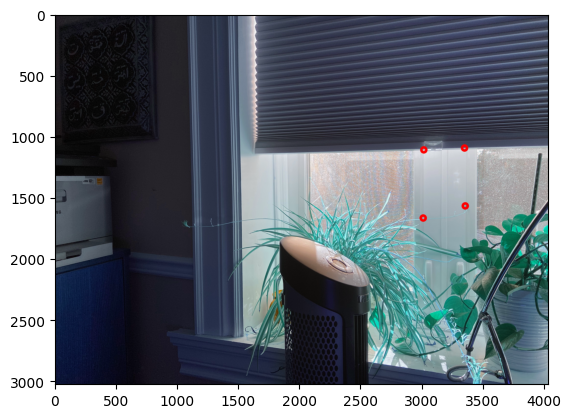

In [10]:
%matplotlib inline

src_pts  = point_picker.points
print('src_pts  = \n', src_pts)
plt.imshow(point_picker.img)
plt.show()

In [11]:
%matplotlib tk

img2 = cv.imread('data/1-right.jpeg')         
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
imgplot = plt.imshow(img2)
point_picker = PointPicker(imgplot, img2)
plt.show()

x=254.42645161290318, y=1064.078064516129
x=618.6070967741935, y=1069.2806451612905
x=639.4174193548388, y=1542.7154838709675
x=275.2367741935484, y=1662.3748387096775


dst_pts = 
 [(254, 1064), (618, 1069), (639, 1542), (275, 1662)]


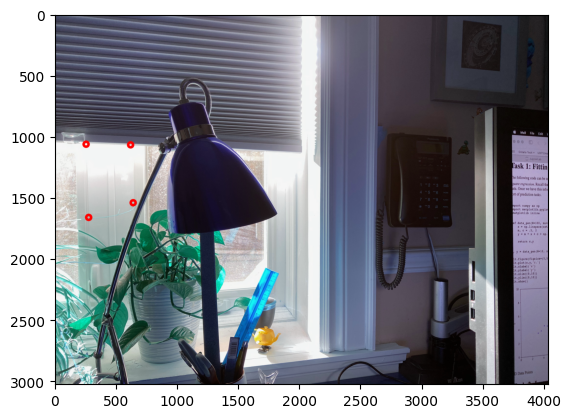

In [12]:
%matplotlib inline

dst_pts = point_picker.points
print('dst_pts = \n', dst_pts)
plt.imshow(point_picker.img)
plt.show()

In [13]:
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=200)

n_pts = len(src_pts)
A = np.zeros((n_pts*2, 9))
for i in range(0, n_pts*2, 2):
    j = int(i/2)
    x = src_pts[j][0]
    y = src_pts[j][1]
    xd = dst_pts[j][0]
    yd = dst_pts[j][1]

    A[i, 0] = x
    A[i, 1] = y
    A[i, 2] = 1
    A[i, 6] = -(x*xd)
    A[i, 7] = -(y*xd)
    A[i, 8] = -xd

    A[i+1, 3] = x
    A[i+1, 4] = y
    A[i+1, 5] = 1
    A[i+1, 6] = -(x*yd)
    A[i+1, 7] = -(y*yd)
    A[i+1, 8] = -yd

print('A = \n', A)

U, D, Vh = np.linalg.svd(A, full_matrices=True)
print('U = \n', U)
print('D = \n', D)
print('Vh = \n', Vh)

H_vec = Vh[-1]
print('H_vec = \n', H_vec)
print('A @ H_vec = \n', A @ H_vec)

H = np.reshape(H_vec, (-1, 3))
print('H = \n', H)

A = 
 [[    3016.     1110.        1.        0.        0.        0.  -766064.  -281940.     -254.]
 [       0.        0.        0.     3016.     1110.        1. -3209024. -1181040.    -1064.]
 [    3349.     1095.        1.        0.        0.        0. -2069682.  -676710.     -618.]
 [       0.        0.        0.     3349.     1095.        1. -3580081. -1170555.    -1069.]
 [    3355.     1568.        1.        0.        0.        0. -2143845. -1001952.     -639.]
 [       0.        0.        0.     3355.     1568.        1. -5173410. -2417856.    -1542.]
 [    3011.     1667.        1.        0.        0.        0.  -828025.  -458425.     -275.]
 [       0.        0.        0.     3011.     1667.        1. -5004282. -2770554.    -1662.]]
U = 
 [[-0.08036478 -0.08501278 -0.43067471 -0.33533065  0.6580416  -0.33915129  0.31071774  0.20928239]
 [-0.33664606 -0.3560954   0.18705689 -0.32288955  0.10398011  0.51675506 -0.27719755  0.51568539]
 [-0.21364472 -0.33781727 -0.44920994  0.5569

src_points = 
 [[   0    1    2 ... 8061 8062 8063]
 [   0    0    0 ... 3023 3023 3023]
 [   1    1    1 ...    1    1    1]]
dst_points = 
 [[-14007 -13989 -13971 ...   2938   2939   2939]
 [ -4521  -4516  -4510 ...   2142   2142   2142]
 [     1      1      1 ...      1      1      1]]


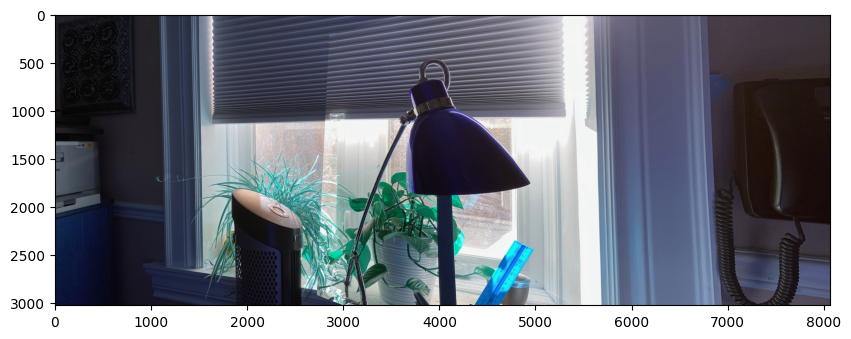

In [14]:
img1 = cv.imread('data/1-left.jpeg')
img2 = cv.imread('data/1-right.jpeg')
h, w, c = img1.shape

img = np.zeros((h, w*2, 3), np.uint8)
img[0:img1.shape[0], 0:img1.shape[1]] = img1 # put in the src img

# create 3xN_SRC_POINTS matrix
n = h*w*2
src_points = np.zeros((3, n))
idx = 0
for i in range(h):
    for j in range(w*2):
        src_points[0, idx+j] = j
        src_points[1, idx+j] = i
    idx += w*2
src_points[2, :] = 1 # convert to homogenous
src_points = src_points.astype(int)
print('src_points = \n', src_points)

dst_points = H @ src_points
# convert to cartesian
dst_points = dst_points / dst_points[2, :]
dst_points = dst_points.astype(int)
print('dst_points = \n', dst_points)

# image stitching
for i in range(n):
    x = dst_points[0, i]
    y = dst_points[1, i]
    src_x = src_points[0, i]
    src_y = src_points[1, i]
    if (x < w and x >= 0) and (y < h and y >= 0):
        img[src_y, src_x, :] = img2[y, x, :]

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()